# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
arquivo = 'housing.csv'
housing_data = pd.read_csv(arquivo)

# Exibindo as primeiras linhas e informações gerais para inspecionar os dados
housing_data_info = housing_data.info()
housing_data_head = housing_data.head()

housing_data_info, housing_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  )

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

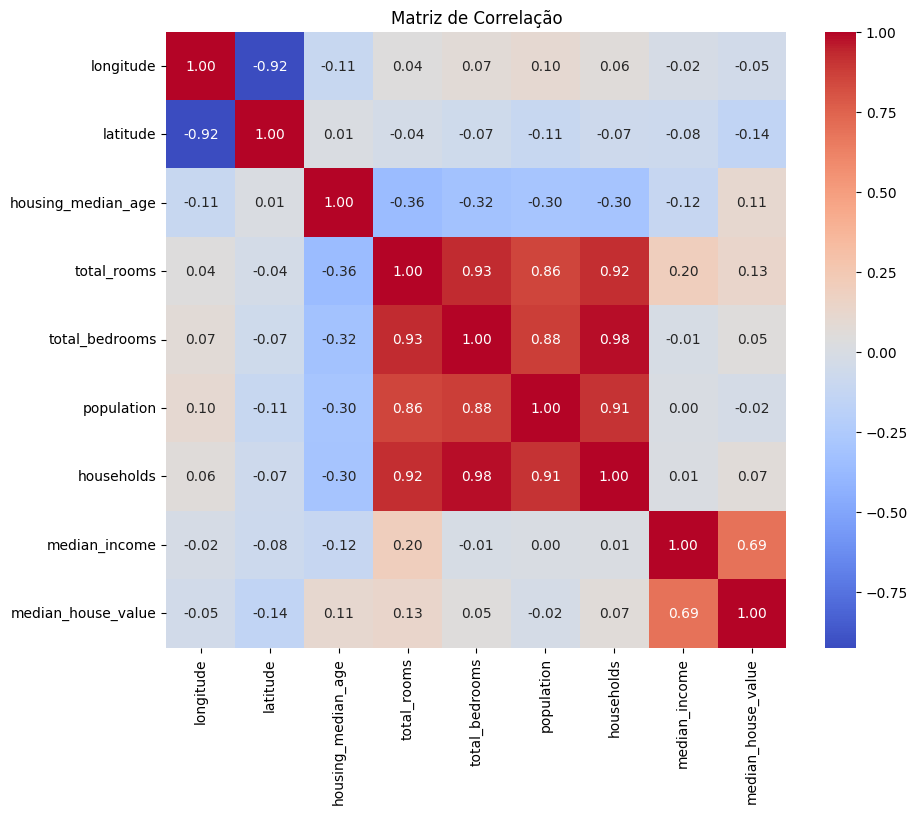

In [8]:
# Calculando a matriz de correlação
correlation_matrix = housing_data.corr(numeric_only=True)

# Configurando o gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Adicionando título ao gráfico
plt.title("Matriz de Correlação")
plt.show()

### 3. Separe os dados em validação e teste

In [9]:
# Selecionando as variáveis preditoras e a variável alvo
X = housing_data.drop("median_house_value", axis=1)
y = housing_data["median_house_value"]

# Dividindo os dados em conjuntos de validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando os tamanhos dos conjuntos
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (16512, 9)
Tamanho do conjunto de teste: (4128, 9)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
# Transformando a coluna categórica
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

# Dividindo os dados novamente
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [12]:
# Modelo com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)

# Modelo com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

# Treinando os modelos nos dados de treinamento
tree_depth_8.fit(X_train, y_train)
tree_depth_2.fit(X_train, y_train)

print("Modelos treinados com sucesso!")

Modelos treinados com sucesso!


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [14]:
# Realizando previsões para o modelo com profundidade = 8
y_train_pred_8 = tree_depth_8.predict(X_train)
y_test_pred_8 = tree_depth_8.predict(X_test)

# Realizando previsões para o modelo com profundidade = 2
y_train_pred_2 = tree_depth_2.predict(X_train)
y_test_pred_2 = tree_depth_2.predict(X_test)

# Calculando o MSE para o modelo com profundidade = 8
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

# Calculando o MSE para o modelo com profundidade = 2
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

# Exibindo os resultados
print(f"MSE (treinamento) - profundidade 8: {mse_train_8:.2f}")
print(f"MSE (teste) - profundidade 8: {mse_test_8:.2f}")
print(f"MSE (treinamento) - profundidade 2: {mse_train_2:.2f}")
print(f"MSE (teste) - profundidade 2: {mse_test_2:.2f}")

MSE (treinamento) - profundidade 8: 3255361754.42
MSE (teste) - profundidade 8: 3946099051.64
MSE (treinamento) - profundidade 2: 6710572662.34
MSE (teste) - profundidade 2: 6893607949.70


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore mais adequada é aquela cujo MSE no teste está mais próximo do MSE no treinamento, ou seja, o MSE com profundidade 2.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

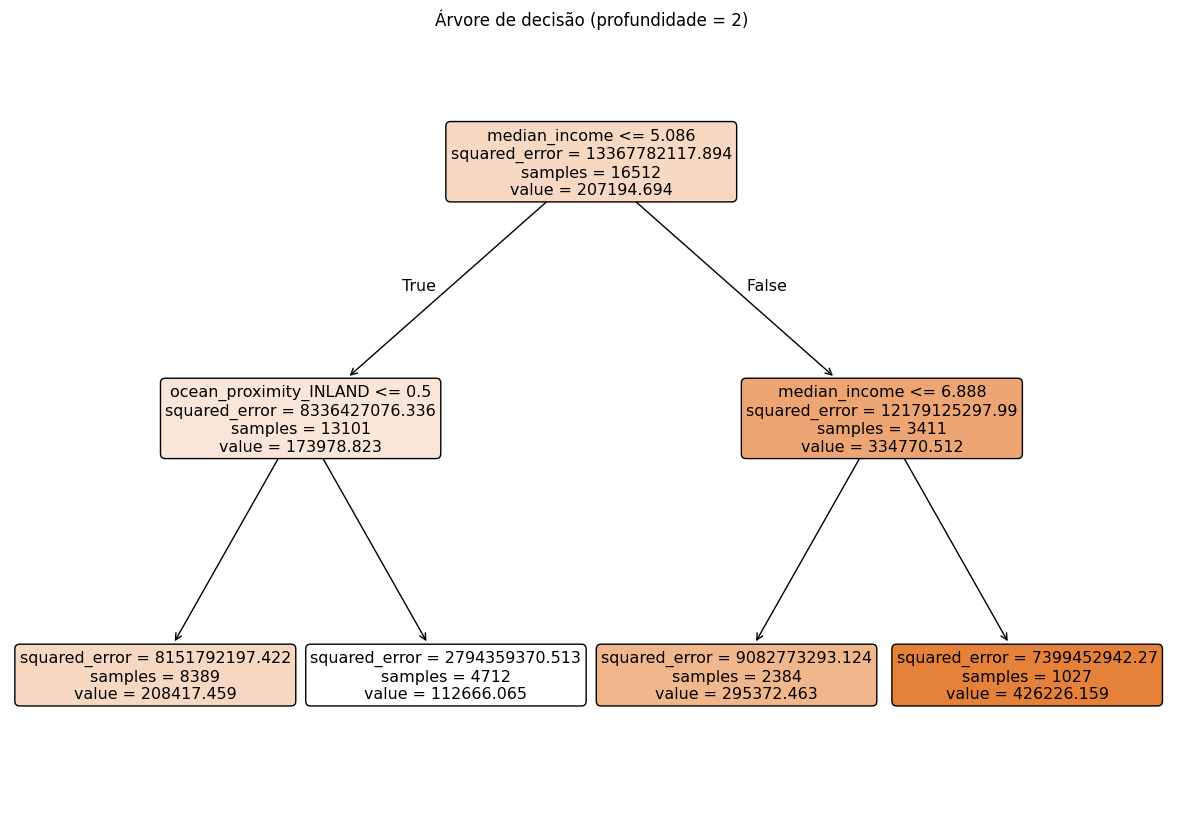

In [17]:
# Visualizando a árvore com profundidade = 2
plt.figure(figsize=(15, 10))  # Tamanho da figura
plot_tree(tree_depth_2, feature_names=X_encoded.columns, filled=True, rounded=True)
plt.title("Árvore de decisão (profundidade = 2)")
plt.show()